# Manipulating Profiles

## Read and visualise equilibrium
- SPR38 inner and outer, visualised.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

%matplotlib inline

<Axes: xlabel='$S_{\\parallel}$ (m from target)', ylabel='$B_{tot}$ (T)'>

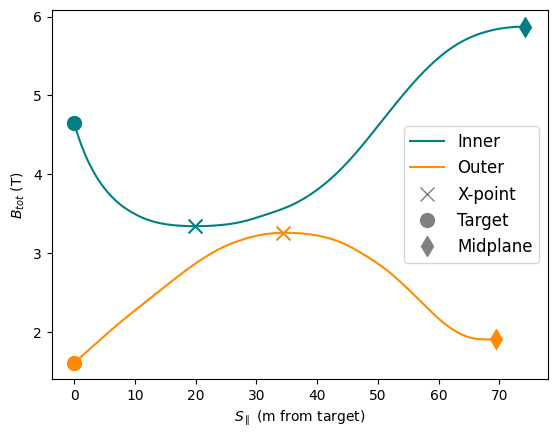

In [2]:
from fusiondls import MagneticGeometry, run_dls
from fusiondls.plot import plot_B_field_profile

spr38 = MagneticGeometry.read_design("eqb_store.pkl", "SPR38")
inner = spr38["iu"]
outer = spr38["ou"]
plot_B_field_profile(
    inner.S, inner.Btot, inner.Xpoint, outer.S, outer.Btot, outer.Xpoint
)

## Scan through manipulated profiles in terms of upstream plasma density
- Take the outer divertor and scale it to different upstream connection lengths, downstream connection lengths and flux expansions.
- For each scaled profile, run a front position scan to find trends in window and threshold later.

In [3]:
from fusiondls.AnalyticCoolingCurves import LfuncKallenbachAr

# set general run parameters
constants = {
    "gamma_sheath": 7,  # sheath transmittion coefficient for virtual target. Choice does not matter if Tt is low
    "Tt": 0.5,  # requested virtual target temp for calculating heat flux at detachment front. Aim for low (sub 1eV) Tt
    "qpllu0": 1e9,  # heat flux density at the x point
    "nu": 1e20,  # Upstream density (if constant)
    "nu0": 1e20,  # Upstream density (if constant)
    "cz0": 0.02,  # Impurity fraction (if constant)
    "Lfunc": LfuncKallenbachAr,  # impurity cooling function. More are available in AnalyticCoolingCurves.py
}

### Scale upstream length $L_m$

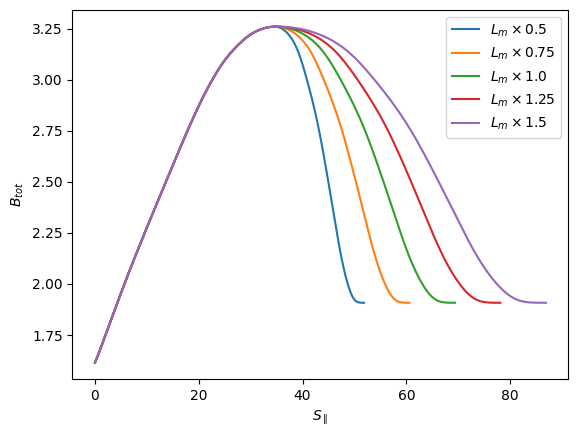

In [4]:
d_lmscale = {}
list_Lm_scales = np.array([0.5, 0.75, 1, 1.25, 1.50])

fig, ax = plt.subplots()
for case in list_Lm_scales:
    d_lmscale[case] = outer.scale_midplane_length(scale_factor=case)
    ax.plot(d_lmscale[case].S, d_lmscale[case].Btot, label=rf"$L_m \times {case}$")

ax.set_xlabel(r"$S_{\parallel}$")
ax.set_ylabel(r"$B_{tot}$")
ax.legend()

In [5]:
lmscan = {}

for case, data in d_lmscale.items():
    print(f"Case {case}:")
    SparRange = np.linspace(0, data.S[data.Xpoint - 1], 5)
    lmscan[case] = run_dls(constants, data, SparRange, control_variable="density")

Case 0.5:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 2.1 seconds
Case 0.75:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.7 seconds
Case 1.0:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 1.25:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 1.5:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.8 seconds


### Scale downstream length $L_x$

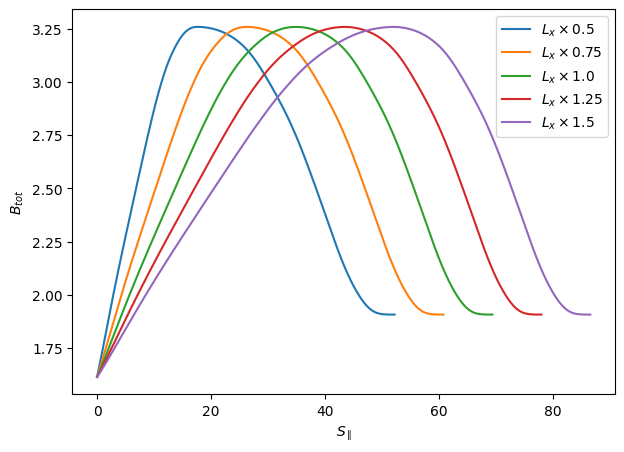

In [6]:
d_lxscale = {}  # store scaled profiles here.
list_Lx_scales = np.array([0.5, 0.75, 1, 1.25, 1.50])  # scale by these scale factors.

fig, ax = plt.subplots(figsize=(7, 5))
for case in list_Lx_scales:
    d_lxscale[case] = outer.scale_connection_length(scale_factor=case)
    ax.plot(d_lxscale[case].S, d_lxscale[case].Btot, label=rf"$L_x \times {case}$")

ax.set_xlabel(r"$S_{\parallel}$")
ax.set_ylabel(r"$B_{tot}$")
ax.legend()

In [7]:
lxscan = {}

for case, data in d_lxscale.items():
    print(f"Case {case}:")
    SparRange = np.linspace(0, data.S[data.Xpoint - 1], 5)
    lxscan[case] = run_dls(constants, data, SparRange, control_variable="density")

Case 0.5:
Solving...0.00...4.19...8.38...12.56...16.75...Complete in 1.8 seconds
Case 0.75:
Solving...0.00...6.28...12.56...18.85...25.13...Complete in 1.4 seconds
Case 1.0:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.4 seconds
Case 1.25:
Solving...0.00...10.47...20.94...31.41...41.88...Complete in 2.1 seconds
Case 1.5:
Solving...0.00...12.56...25.13...37.69...50.26...Complete in 2.1 seconds


### Scale flux expansion $B_x/B_t$

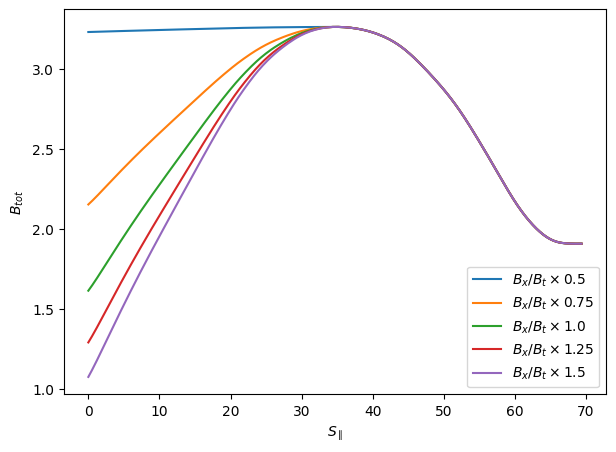

In [8]:
d_BxBtscale = {}
list_BxBt_scales = np.array([0.5, 0.75, 1, 1.25, 1.50])

fig, ax = plt.subplots(figsize=(7, 5))
for case in list_BxBt_scales:
    d_BxBtscale[case] = outer.scale_flux_expansion(scale_factor=case)
    ax.plot(
        d_BxBtscale[case].S, d_BxBtscale[case].Btot, label=rf"$B_x/B_t \times {case}$"
    )

ax.set_xlabel(r"$S_{\parallel}$")
ax.set_ylabel(r"$B_{tot}$")
ax.legend()

In [9]:
bxbtscan = {}

for case, data in d_BxBtscale.items():
    print(f"Case {case}:")
    SparRange = np.linspace(0, data.S[data.Xpoint - 1], 5)
    bxbtscan[case] = run_dls(constants, data, SparRange, control_variable="density")

Case 0.5:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 0.75:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 1.0:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 1.25:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 1.6 seconds
Case 1.5:
Solving...0.00...8.38...16.75...25.13...33.50...Complete in 2.0 seconds


## Post-processing

### Collect the three scans into data structure

In [10]:
# Collect labels and data of the three scans------------------------------------
scales = [list_Lx_scales, list_Lm_scales, list_BxBt_scales]
stores = [lxscan, lmscan, bxbtscan]
datas = [d_lxscale, d_lmscale, d_BxBtscale]
names = ["$L_x$ scan", "$L_m$ scan", "$B_X/B_t$ scan"]

# Collect results of the three scans--------------------------------------------
thresholds = {}
windows = {}
w_ratio = {}
t_ratio = {}

for g in range(3):
    thresholds[g] = []
    windows[g] = []

    for case in scales[g]:
        o = stores[g][case]
        Xpoint = datas[g][case].Xpoint
        windows[g].append(o["window_ratio"])
        thresholds[g].append(o["threshold"])

    windows[g] = np.array(windows[g])
    thresholds[g] = np.array(thresholds[g])

    w_ratio[g] = windows[g] / windows[g][2]
    t_ratio[g] = 1 / (thresholds[g] / thresholds[g][2])

# Collect average B and total L for scaling purposes------------------------------
Bavg_scales = [None] * 3
Ltot_scales = [None] * 3

for g in range(3):
    Bavgs = []
    Ltots = []
    for case in scales[g]:
        d = datas[g][case]
        Bavgs.append(np.mean(d.Btot[: d.Xpoint]))
        Ltots.append(d.S[-1])

    Bavg_scales[g] = np.array(Bavgs) / Bavgs[2]
    Ltot_scales[g] = np.array(Ltots) / Ltots[2]

### Plot trends in threshold and window for each scan

- Detachment threshold: density required for detachment.
- Detachment window: ratio of density when front is at the X-point to when it is at the target. (operational window)
- DLS-Extended no longer has the same scalings as the original DLS due to finite width radiation region effects

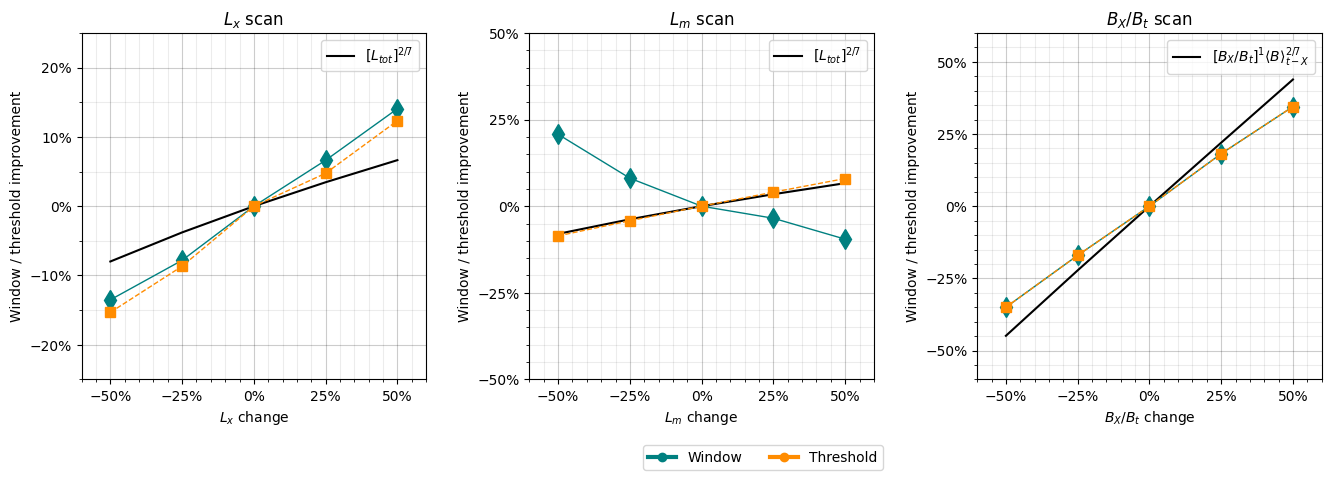

In [11]:
from fusiondls.plot import colors

fig, axes = plt.subplots(1, 3, figsize=(16, 4.5), sharey=False)
fig.subplots_adjust(wspace=0.3)
for g in range(3):
    ax = axes[g]
    ax.set_title(names[g])
    ax.plot(
        scales[g] - 1,
        w_ratio[g] - 1,
        marker="d",
        linestyle="solid",
        color=colors[0],
        markersize=10,
        linewidth=1,
    )
    ax.plot(
        scales[g] - 1,
        t_ratio[g] - 1,
        marker="s",
        linestyle="dashed",
        color=colors[1],
        markersize=7,
        linewidth=1,
    )
    ax.set_xlabel("{} change".format(names[g].replace(" scan", "")))

    ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0%}"))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0%}"))
    ax.xaxis.set_major_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.25))
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.grid(which="major", color="black", alpha=0.2)
    ax.grid(which="minor", color="black", alpha=0.075)
    ax.set_ylim(-0.60, 0.60)
    ax.set_xlim(-0.60, 0.60)

axes[0].set_ylim(-0.25, 0.25)
axes[1].set_ylim(-0.50, 0.50)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))

styles = {"color": "black", "linestyle": "solid", "zorder": 0, "linewidth": 1.5}
axes[0].plot(
    list_Lx_scales - 1,
    Ltot_scales[1] ** (2 / 7) - 1,
    **styles,
    label="$[L_{tot}]^{2/7}$",
)
axes[1].plot(
    list_Lm_scales - 1,
    Ltot_scales[1] ** (2 / 7) - 1,
    **styles,
    label="$[L_{tot}]^{2/7}$",
)
axes[2].plot(
    list_Lm_scales - 1,
    list_BxBt_scales * (Bavg_scales[2] ** (2 / 7)) - 1,
    **styles,
    label=r"$[B_X/B_t]^{1} {\langle}B{\rangle}^{2/7}_{t-X}$",
)

for ax in axes:
    ax.legend()
    ax.set_ylabel("Window / threshold improvement")

legend_elements = [
    mpl.lines.Line2D([0], [0], color=colors[0], lw=3, marker="o", label="Window"),
    mpl.lines.Line2D([0], [0], color=colors[1], lw=3, marker="o", label="Threshold"),
]

fig.legend(handles=legend_elements, ncol=5, bbox_to_anchor=(0.63, -0.02))